### 목차
- 코드보다 그림을 보고 이해하는게 더 중요함!
- 분할 정복
- 분할 정복 알고리즘
  - 병합 정렬
  - 퀵 정렬
  - 이진 검색

# 분할 정복

### 문제 : 가짜 동전 찾기
- n개의 동전들 중에 가짜 동전이 하나 포함되어 있다. 가짜 동전은 진짜 동전에 비해 아주 조금 가볍다. 진짜 동전들의 무게가 동일하다고 할 때 양팔 저울을 이용해서 가짜 동전을 찾아보자
- 양팔 저울을 최소로 사용해서 가짜 동전을 찾는 방법은?
- 반씩 나눠서 찾는다 -> 분할 정복!

### 설계 전략 (Top-down approach)
1. 분할(Divide) : 해결할 문제를 여러개의 작은 부분으로 나눈다
2. 정복(Conquer) : 나눈 문제를 각각 해결한다
3. 통합(Combine) : 필요하다면 해결된 해답을 모은다
- 분할은 더이상 분할 할 수 없을때까지 or 필요가 없을 때까지 분할한다

### 분할정복 기법 예시
1. 거듭 제곱 문제
- 자연수 C의 n제곱 값을 구하는 함수
- 짝수 : 2^n/2 * 2^n/2
- 홀수 : 2^((n-1)/2) * 2(^(n-1)/2) * 2
- ex ) C^8 = C^4 * C^4 = C^2 * C^2 * C^2 * C^2
- O(log2n)의 속도

## 병합 정렬
- 여러 개의 정렬된 자료의 집합을 병합하여 한 개의 정렬된 집합으로 만드는 방식
- 분할 정복 알고리즘 활용 
  - 자료를 최소 단위 문제까지 나눈 후에 차례대로 정렬하여 최종 결과를 얻어냄
  - top-down 방식
- 시간 복잡도 : O(n log n)
- sort가 더 빠르지만 특정 상황에서는 병합 정렬이 더 빠를 수도 있기 때문에 알아둬야함~! 구현은 많이 안해도 됨! 머리속 이해가 중요!
- [2] : 원소가 하나니까 정렬 된 것!


### 병합 정렬 과정
- 분할 하면 자연스럽게 정렬이 되기 때문에 병합 정렬에서는 정렬 과정은 없음

1. 분할 단계
- 전체 자료 집합에 대하여 최소 크기의 부분집합이 될 때까지 분할 작업을 계속 한다.(원소가 하나가 될 때까지)
- 시간 복잡도 : O(N log N)
  - 높이 log n(총 분할 횟수) * 원소 개수 n(모든 원소를 각 단계에서 비교해야 하기 떄문에)

2. 병합 단계
- 2개의 부분집합을 정렬하면서 하나의 집합으로 병합
- 작은 값을 앞에 먼저 넣어줌
- 8개의 부분 집합이 1개로 병합될 때까지 반복함


#### Sort와 Sorted 차이 (개인공부)
- lst.sort() : 해당 리스트의 값 자체를 변경
- sorted(lst) : 해당 리스트 값을 정렬해서 표출만 함. list의 값 자체에는 변화가 없음

- sort : 오름차순 정렬이 기본(reverse = False)
- 내림차순 sort : lst.sort(reverse=True)


In [ ]:
def merge_sort(m):
    # 리스트의 길이가 1이면 이미 정렬된 상태이므로 그대로 반환
    if len(m) == 1:
        return m

    # 리스트를 절반으로 나누기 위해 중간 인덱스를 계산
    mid = len(m) // 2
    left = m[:mid]  # 리스트의 앞쪽 절반
    right = m[mid:]  # 리스트의 뒤쪽 절반

    # 재귀적으로 왼쪽 부분과 오른쪽 부분을 정렬
    left = merge_sort(left)
    right = merge_sort(right)

    # 두 개의 정렬된 리스트를 병합하여 반환
    return merge(left, right)


def merge(left, right):
    # 두 리스트를 병합할 결과 리스트를 초기화
    result = [0] * (len(left) + len(right))
    l = r = 0  # 왼쪽 리스트와 오른쪽 리스트의 인덱스

    # 두 리스트를 순차적으로 비교하여 작은 값을 결과 리스트에 추가
    while l < len(left) and r < len(right):
        if left[l] < right[r]:
            result[l + r] = left[l]
            l += 1
        else:
            result[l + r] = right[r]
            r += 1

    # 왼쪽 리스트에 남은 요소들을 결과 리스트에 추가
    while l < len(left):
        result[l + r] = left[l]
        l += 1

    # 오른쪽 리스트에 남은 요소들을 결과 리스트에 추가
    while r < len(right):
        result[l + r] = right[r]
        r += 1

    # 병합된 결과 리스트를 반환
    return result


arr = [69, 10, 30, 2, 16, 8, 31, 22]
arr = merge_sort(arr)
print(arr)


## 퀵 정렬
- 주어진 배열을 두개로 분할하고, 각각을 정렬한다.
- **평균적으로** 매우 빠르다 => O(NlogN) (N : 파티셔닝, logN : 분할 작업)
- 최악의 경우(역순정렬된 데이터) : O(N^2)
- 병합 정렬과 다른 점
  1. 병합 정렬은 그냥 두 부분을 나누는 반면에 퀵 정렬은 분할할 때, 기준 아이템(pivott item) 중심으로 분할한다
    - 기준보다 작은 것은 왼편, 큰 것은 오른편에 위치시킨다.
  2. 각 부분 정렬이 끝난 후, 병합 정렬은 "병합" 이란 후처리작업이 필요하나, 퀵 정렬은 필요로 하지 않는다
    - 한 리스트 내에서 작업하기 때문에 병합은 필요 없지만 swap은 많이 함
- Quick Sort는 Partitioning 이라는 과정을 반복하면서, 평균 시간복잡도 O(nlogn) 속도라는 빠른 속도로 정렬되는 Sort이다.

### 퀵 정렬 과정
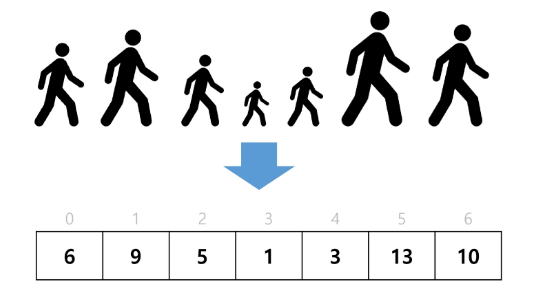
1. 작업 영역을 정한다
2. 작업 영역 중 가장 왼쪽에 있는 수를 Pivot 이라고 하자
  - Pivot 을 어떻게 설정하느냐에 따라 성능이 다르다
  - 중간값, 우측 끝 값을 설정해도 상관 없지만, 이번 케이스에서는 왼쪽 끝 값을 기준으로 한다.
3. Pivot을 기준으로 왼쪽에는 Pivot보다 작은 수를 배치한다(정렬 안됨)  
   Pivot을 기준으로 오른쪽에는 Pivot보다 큰 수를 배치한다(정렬 안됨)
4. 파티셔닝이 끝나고 Pivot의 위치는 확정(Fix) 된다.  
   즉, 정렬이 다 되었을 때에도 피봇의 위치는 지금 위치 그대로 배정된다.


### 피봇 선택
- 왼쪽일 때
  - 간단해서 코드 구현이 쉬움
  - 단점 : 역순 정렬되어있을 때 하나하나 확인해야하기 때문에 swap이 많이 발생한다(N^2)
- 그러므로 데이터마다 상황에 맞게 선택해야 함


### Hoare-Partiton 알고리즘
- 끝에 있는 i와 j가 중심으로 모이는 방식
- i 는 오른쪽으로 가면서 피봇보다 큰 수를 찾고, j는 왼쪽으로 가면서 피봇보다 작은 수를 찾아 swap한다
- j와 i가 교차하면 파티션 한 번이 끝난다.
- i와 j가 교차하면 i,j는 피봇을 기준으로 작은 값과 큰 값들의 경계에 위치한다.
- 마지막에는 피봇과 j의 위치를 교차한다

In [ ]:
arr = [3, 2, 4, 6, 9, 1, 8, 7, 5]
# arr = [11, 45, 23, 81, 28, 34]
# arr = [11, 45, 22, 81, 23, 34, 99, 22, 17, 8]
# arr = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]


# 피벗: 제일 왼쪽 요소
# 이미 정렬된 배열이나 역순으로 정렬된 배열에서 최악의 성능을 보일 수 있음
def hoare_partition1(left, right):
    pivot = arr[left]  # 피벗을 제일 왼쪽 요소로 설정
    i = left + 1
    j = right

    while i <= j:       # 교차할 때까지 또는 같은 걸 반복할 때까지 반복
        while i <= j and arr[i] <= pivot:       #  i는 피봇보다 작거나 같으면 += 1(다음으로) => 큰 값을 탐색하는 거니까
            i += 1

        while i <= j and arr[j] >= pivot:       # j는 피봇보다 크거나 같으면 -1(다음으로) => 작은 값 탐색
            j -= 1

        if i < j:                               # 아직 교차되기 전이라면,  큰 값은 왼쪽, 작은 값은 오른쪽에 있으니 swap
            arr[i], arr[j] = arr[j], arr[i]

    arr[left], arr[j] = arr[j], arr[left]
    return j


# 피벗: 제일 오른쪽 요소(참고)
# 이미 정렬된 배열이나 역순으로 정렬된 배열에서 최악의 성능을 보일 수 있음
def hoare_partition2(left, right):
    pivot = arr[right]  # 피벗을 제일 오른쪽 요소로 설정
    i = left
    j = right - 1

    while i <= j:
        while i <= j and arr[i] <= pivot:
            i += 1
        while i <= j and arr[j] >= pivot:
            j -= 1
        if i < j:
            arr[i], arr[j] = arr[j], arr[i]

    arr[i], arr[right] = arr[right], arr[i]
    return i


# 피벗: 중간 요소로 설정(참고)
# 일반적으로 더 균형 잡힌 분할이 가능하며, 퀵 정렬의 성능을 최적화할 수 있습니다.
def hoare_partition3(left, right):
    mid = (left + right) // 2
    pivot = arr[mid]  # 피벗을 중간 요소로 설정
    arr[left], arr[mid] = arr[mid], arr[left]  # 중간 요소를 왼쪽으로 이동 (필요 시)
    i = left + 1
    j = right

    while i <= j:
        while i <= j and arr[i] <= pivot:
            i += 1
        while i <= j and arr[j] >= pivot:
            j -= 1
        if i < j:
            arr[i], arr[j] = arr[j], arr[i]

    arr[left], arr[j] = arr[j], arr[left]
    return j


def quick_sort(left, right):
    if left < right:
        pivot = hoare_partition1(left, right)
        # pivot = hoare_partition2(left, right)
        # pivot = hoare_partition3(left, right)
        quick_sort(left, pivot - 1)
        quick_sort(pivot + 1, right)


quick_sort(0, len(arr) - 1)
print(arr)


### Lomuto partition 알고리즘
![7-Lomuto partition.PNG](<attachment:7-Lomuto partition.PNG>)

- Hoare 보다 느림! 그냥 이런게 있다는 것만 알아두면 됨!
- 무조건 우측을 피봇으로 잡고 i,j를 -1,0으로 잡음
- i,j가 피봇보다 큰 수를 만날 때까지 진행
- 피봇보다 큰 수를 만나면 i는 정지, j는 계속 진행
- 피봇보다 작은 수를 만나면 j가 정지
- i와 j를 바꿈

- 특징
  - 같은 수가 많을 때 또는 역순 정렬 된 데이터에서 최악의 성능을 나타내기 때문에 자주 사용하지 않음
  - 두개의 차이점만 알아두면 됨
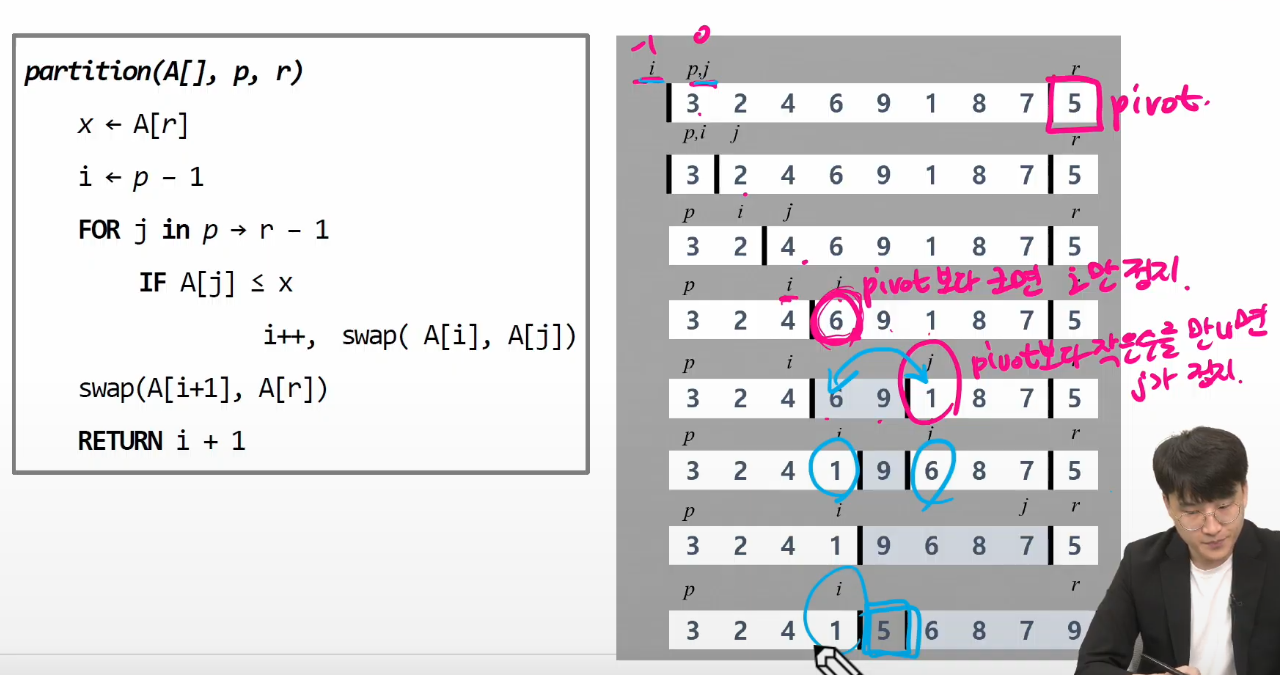

## 이진 탐색  
- 병뚜껑 속의 숫자 게임(UP&DOWN 게임) : 절반씩 부르면 빨리 찾을 수 있음!
- 자료의 가운데에 있는 항목의 키 값과 비교하여 다음 검색의 위치를 결정하고 검색을 계속 진행하는 방법
  - 목적 키를 찾을 때까지 이진 검색을 순환적으로 반복 수행함으로써 검색 범위를 반으로 줄여가면서 보다 빠르게 검색을 수행함
- <span style = "color:red"> 이진 검색을 하기 위해서는 자료가 정렬된 상태여야 한다</span>

### 검색 과정
1. 자료의 중앙에 있는 원소를 고른다
2. 중앙 원소의 값과 찾고자 하는 목표 값을 비교한다.
3. 목표 값이 중앙 원소의 값보다 작으면 자료의 왼쪽 반에 대해서 새로 검색을 수행하고, 크다면 자료의 오른쪽 반에 대해서 새로 검색을 수행한다.
4. 찾고자 하는 값을 찾을 때까지 1~3의 과정을 반복한다.



In [1]:
arr = [2, 4, 7, 9, 11, 19, 23]
# 이진 탐색은 정렬된 데이터에 적용 가능하다.
# 정렬 안된 데이터는 정렬시간(O(NlogN))까지 고려해야함 
# -> 최종 : N logN + logN
# arr.sort()


def binary_search(target):
    low = 0
    high = len(arr) - 1
    # 탐색 횟수 카운팅
    cnt = 0

    while low <= high:
        mid = (low + high) // 2
        cnt += 1

        if arr[mid] == target:      # 타겟을 찾으면 끝
            return mid, cnt
        elif arr[mid] > target:     # 타겟이 더 작으면 왼쪽을 확인 = high 값을 옮김
            high = mid - 1
        else:                       # 타겟이 더 크면 오른쪽을 확인 = low 값을 옮김
            low = mid + 1
    return -1, cnt


print(f'9 = {binary_search(9)}')    # 값의 인덱스와 분할 횟수
print(f'2 = {binary_search(2)}')
print(f'20 = {binary_search(20)}')


9 = (3, 1)
2 = (0, 3)
20 = (-1, 3)


In [ ]:
arr = [2, 4, 7, 9, 11, 19, 23]
# 이진 탐색은 정렬된 데이터에 적용 가능하다.
# arr.sort()


def binary_search(low, high, target):
    # 기저조건
    # target 을 발견하지 못하면 종료
    if low > high:
        return -1

    mid = (low + high) // 2

    # 발견했다면
    if target == arr[mid]:
        return mid

    # target 이 mid 보다 작다 == target 이 mid 의 왼쪽에 존재한다 == high 를 mid - 1로
    elif target < arr[mid]:
        return binary_search(low, mid - 1, target)      #봐야할 위치를 다음 재귀함수에게 전달
    else:
        return binary_search(mid + 1, high, target)


print(f'9 = {binary_search(0, len(arr) - 1, 9)}')
print(f'2 = {binary_search(0, len(arr) - 1, 2)}')
print(f'20 = {binary_search(0, len(arr) - 1, 20)}')

## 분할 정복 알고리즘 정리
### 병합 정렬
- 외부 정렬(External Sort)의 기본이 되는 정렬 알고리즘이다.
- 멀티코어(Multi-Core) CPU나 다수의 프로세서에서 정렬 알고리즘을 병렬화하기 위해 병합 정렬 알고리즘이 활용된다.
### 퀵 정렬
- 매우 큰 입력 데이터에 대해서 좋은 성능을 보이는 알고리즘
### 이진 검색
- 정렬된 데이터를 기준으로 특정 값이나 범위를 검색하는데 사용
- 이진 검색을 활용한 심화 학습 키워드
  - 정렬된 배열에서 특정 값 이상(이하)가 처음으로 나타나는 위치를 찾는 알고리즘
  - 특정 데이터의 범위 검색 등에서 활용
